# 資料視覺化

## 載入資料

若還沒安裝套件，請先執行下列指令安裝：
```
!pip install matplotlib seabron pandas plotly numpy openpyxl
```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
# 載入鳶尾花資料集
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# 載入超市銷售資料集
sales = pd.read_excel("Superstore Dataset.xlsx")
sales

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [4]:
print(f"iris欄位名稱: {list(iris.columns)}")
print(f"sales欄位名稱: {list(sales.columns)}")

iris欄位名稱: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sales欄位名稱: ['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit']


In [12]:
# 設定matplotlib繪圖時的字型
import platform
system = platform.system()
if system == "Windows":
    plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"] 
elif system == "Darwin":
    plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]

## 組成圖表

### 圓餅圖

In [6]:
# 計算各區域的銷售數量
region_sales = sales['Region'].value_counts()
region_sales

Region
West       1900
East       1687
Central    1381
South       931
Name: count, dtype: int64

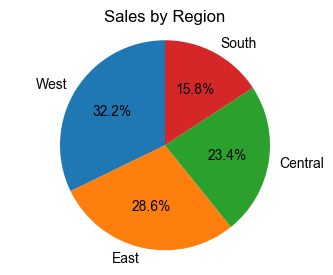

In [13]:
# 繪製圓餅圖
plt.figure(figsize=(4, 3))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90) # autopct='%1.1f%%'為顯示百分比
plt.axis('equal')  # 使圓餅圖為正圓形
plt.title('Sales by Region')
plt.show()

### 百分比堆疊圖
我們想根據Region和Category繪製圖表，可以按照以下步驟操作：

+ 根據Region和Category對資料進行分組，計算每個組的總銷售額。
+ 計算每個Region的總銷售額。
+ 將每個組的銷售額除以其所屬Region的總銷售額，得到百分比。
+ 使用matplotlib或seaborn繪製百分比堆疊圖。

In [7]:
# 先做一些資料處理

# 根據Region和Category對資料進行分組，計算每個組的總銷售額
grouped_sales = sales.groupby(['Region', 'Category']).agg({'Sales': 'sum'}).reset_index()

# 計算每個Region的總銷售額
total_sales_by_region = sales.groupby('Region').agg({'Sales': 'sum'})

# 將每個組的銷售額除以其所屬Region的總銷售額，得到百分比
grouped_sales['Percentage'] = grouped_sales.apply(lambda row: row['Sales'] / total_sales_by_region.loc[row['Region'], 'Sales'], axis=1)

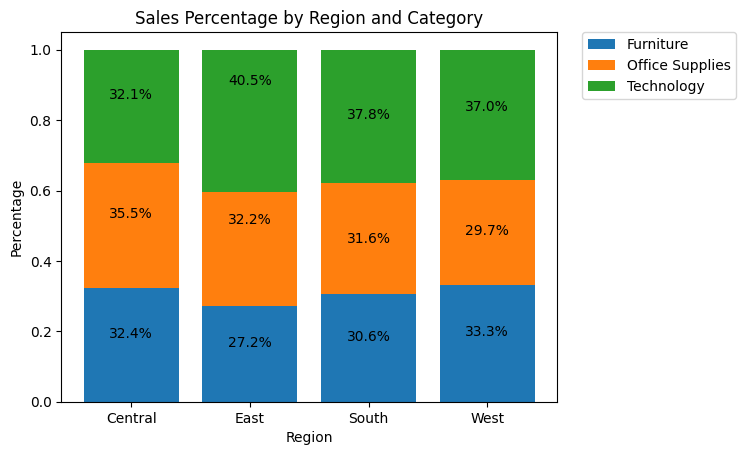

In [8]:
# 使用matplotlib繪製百分比堆疊圖
fig, ax = plt.subplots()

# 繪製堆疊圖的底部位置
bottoms = [0, 0, 0, 0]

# 依次繪製每個Category的百分比
for category in grouped_sales['Category'].unique():
    percentages = grouped_sales[grouped_sales['Category'] == category]['Percentage']
    rects = ax.bar(grouped_sales['Region'].unique(), percentages, bottom=bottoms, label=category)
    
    # 在每個區塊上添加百分比標記
    for rect, percentage in zip(rects, percentages):
        height = rect.get_height()
        ax.annotate('{:.1%}'.format(percentage),
                    xy=(rect.get_x() + rect.get_width() / 2, bottoms[int(rect.get_x())] + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    
    bottoms = [x + y for x, y in zip(bottoms, percentages)]

# 設定圖表標題和軸標籤
ax.set_title('Sales Percentage by Region and Category')
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')

# 顯示圖例,在圖表外面放置圖例
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# 顯示圖表
plt.show()

### 矩陣樹狀圖

In [26]:
# 計算每個子類別的總銷售額
sales_by_subcategory = sales.groupby('Sub-Category')['Sales'].sum().reset_index()

# 繪製Treemap
fig = px.treemap(sales_by_subcategory, path=['Sub-Category'], values='Sales',
                 title='Sales by Sub-Category')
fig.show()

## 比較圖表

### 長條圖

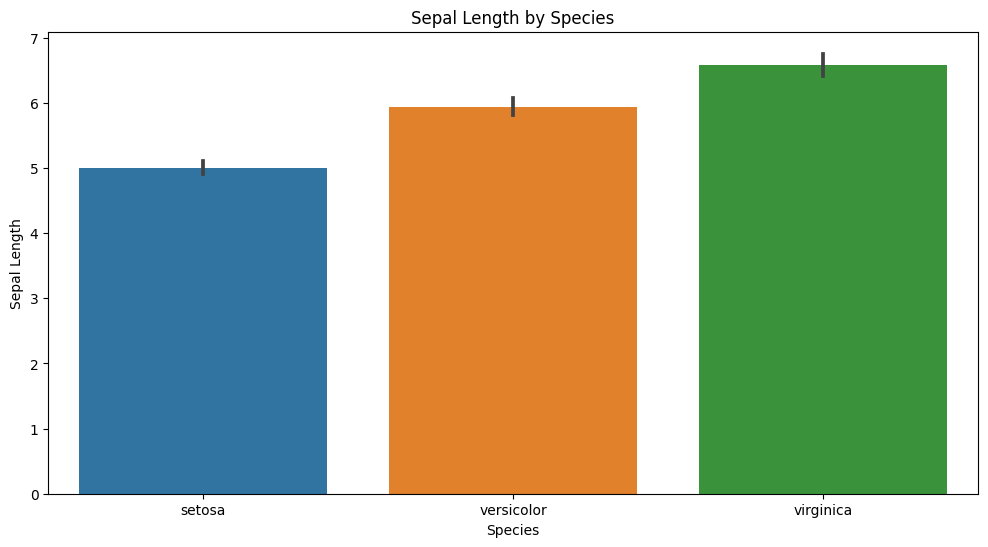

In [10]:
# 繪製長條圖
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="species", y="sepal_length", data=iris)

# 設定圖表標題和軸標籤
ax.set_title("Sepal Length by Species")
ax.set_xlabel("Species")
ax.set_ylabel("Sepal Length")

# 顯示圖表
plt.show()

### 平行座標圖

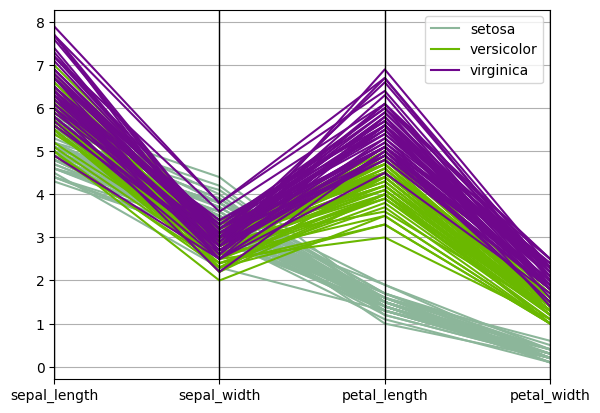

In [11]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, 'species')
plt.show()

### 熱力圖

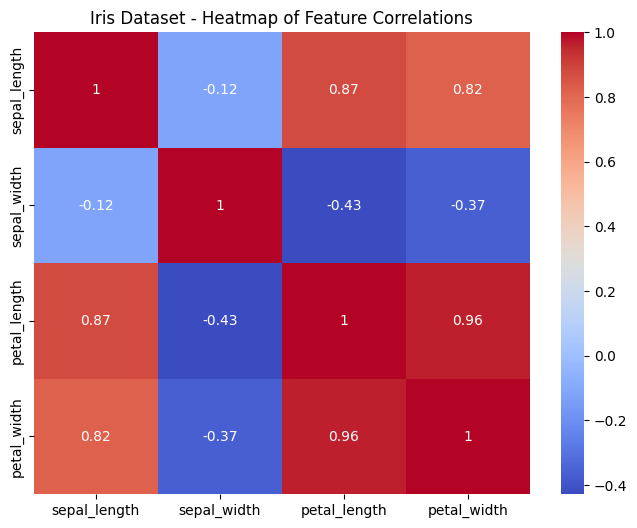

In [12]:
# 提取數值型欄位
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 計算數值型欄位之間的相關性
correlation_matrix = iris[numerical_columns].corr()

# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Iris Dataset - Heatmap of Feature Correlations')
plt.show()


### 相關係數圖

## 分佈圖表

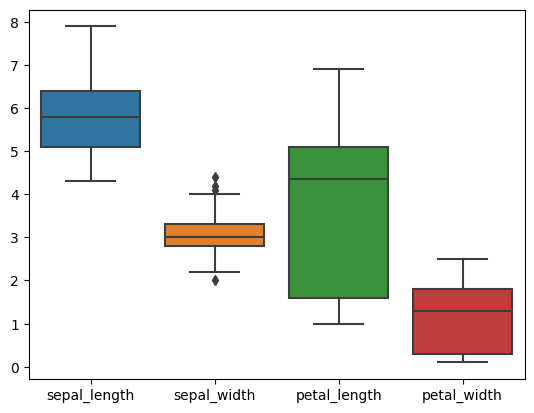

In [13]:
# 繪製盒狀圖
sns.boxplot(data=iris)
plt.show()

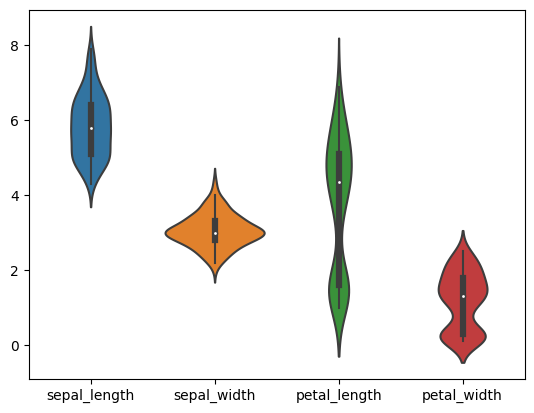

In [14]:
# 繪製小提琴圖
sns.violinplot(data=iris)
plt.show()

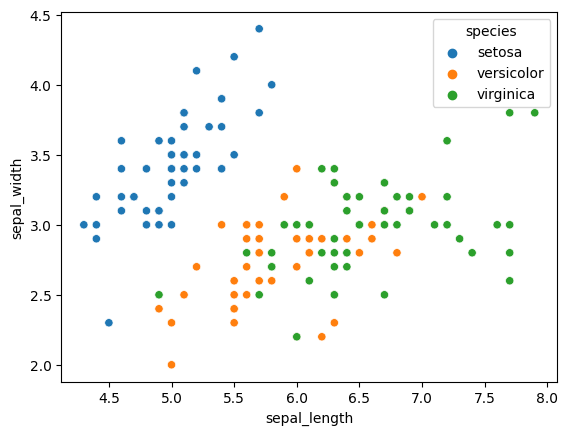

In [15]:
# 繪製散佈圖
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

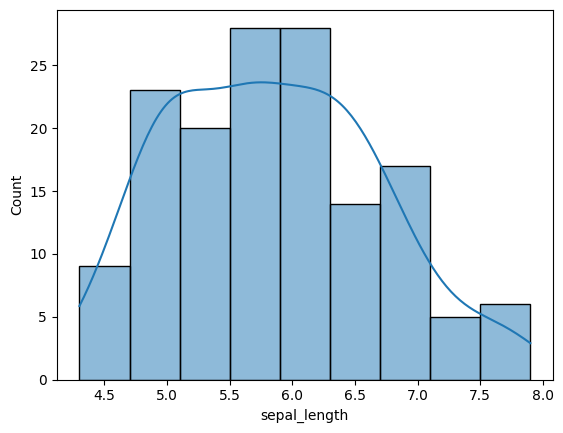

In [16]:
# 繪製直方圖
sns.histplot(data=iris, x='sepal_length', kde=True)
plt.show()

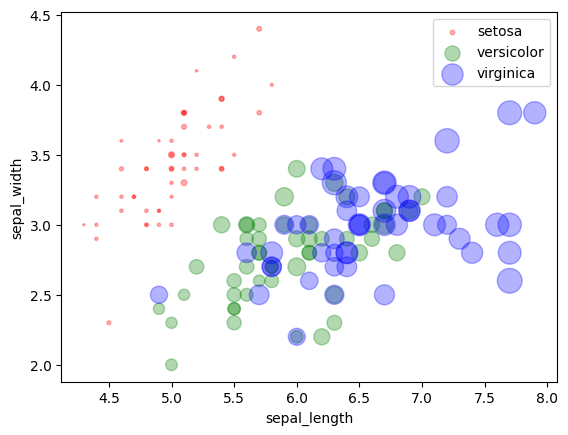

In [25]:
# 繪製泡泡圖(泡泡大小代表其中一個特徵的值)

# 定義顏色對應的字典
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
# 使用numpy的unique函數找到所有不重複的類別
unique_species = np.unique(iris['species'])

# 繪製泡泡圖，將不同類別的資料用不同顏色表示
# 泡泡大小用petal_length * petal_width表示
for species in unique_species:
    plt.scatter(iris[iris['species'] == species]['sepal_length'],
                iris[iris['species'] == species]['sepal_width'],
                s=iris[iris['species'] == species]['petal_length'] * iris[iris['species'] == species]['petal_width'] * 20,
                alpha=0.3,
                label=species,
                c=colors[species])

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


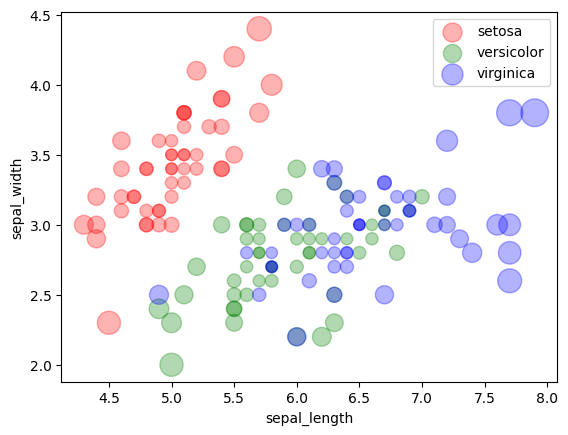

In [22]:
# 繪製泡泡圖()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 假設已經有iris資料集
# 定義顏色對應的字典
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
unique_species = np.unique(iris['species'])

# 計算K個最近鄰居的數量
K = 20
X = iris[['sepal_length', 'sepal_width']].values
nbrs = NearestNeighbors(n_neighbors=K).fit(X)
distances, indices = nbrs.kneighbors(X)

# 繪製泡泡圖，將不同類別的資料用不同顏色表示
for species in unique_species:
    species_data = iris[iris['species'] == species]
    species_indices = species_data.index
    species_bubble_sizes = np.sum(distances[species_indices], axis=1)
    
    plt.scatter(species_data['sepal_length'],
                species_data['sepal_width'],
                s=species_bubble_sizes*20,
                alpha=0.3,
                label=species,
                c=colors[species])

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


## 趨勢圖表

### 折線圖

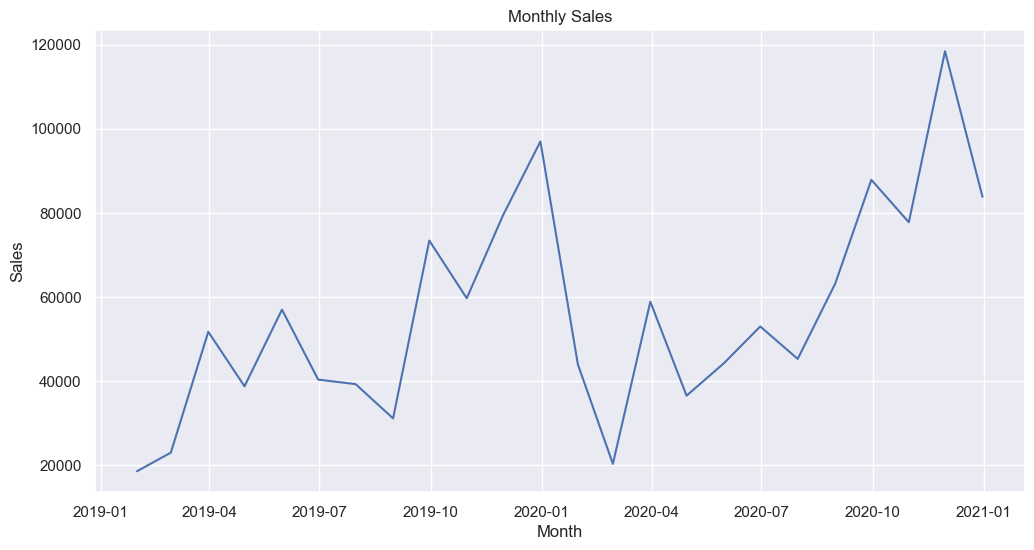

In [46]:
# 將Order Date轉換為datetime格式
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# 將Order Date設置為索引
sales.set_index('Order Date', inplace=True)

# 按月匯總銷售額
monthly_sales = sales['Sales'].resample('M').sum()

# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()


### 桑基圖

In [27]:
import plotly.graph_objects as go

# 計算區域和產品類別之間的銷售額
region_category_sales = sales.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# 建立桑基圖
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Central", "East", "South", "West", "Furniture", "Office Supplies", "Technology"],
        color="blue"
    ),
    link=dict(
        source=[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3],
        target=[4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6],
        value=region_category_sales['Sales'].values
    )
))

fig.update_layout(title_text="Sales by Region and Category", font_size=10)
fig.show()


### 瀑布圖
注意，第一個月的數據將被忽略，因為它沒有前一個月的數據可以進行比較。

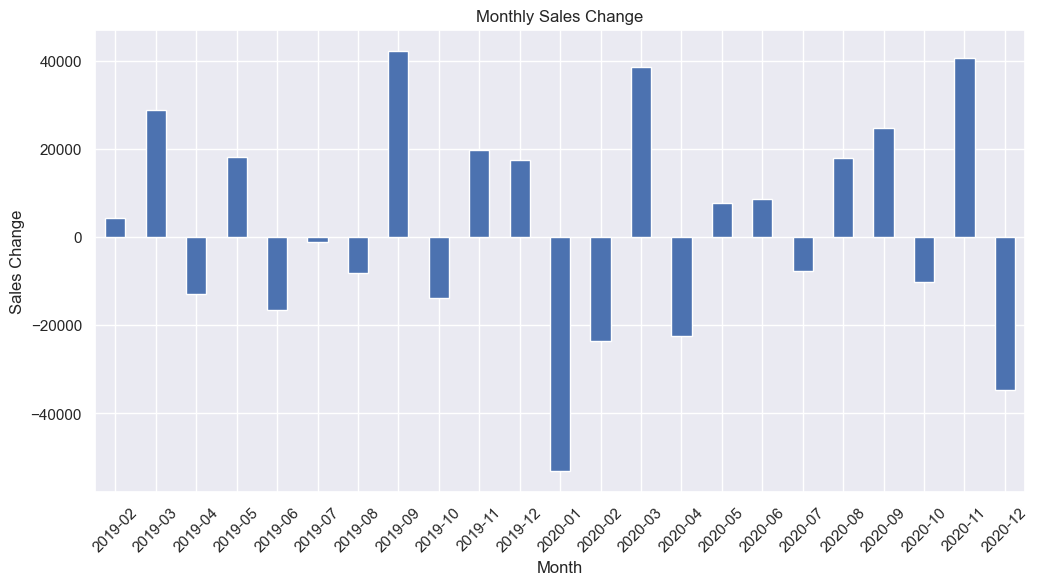

In [49]:
# 計算每個月的銷售額變化
monthly_sales_diff = monthly_sales.diff().dropna()

# 繪製瀑布圖
fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales_diff.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Sales Change')
ax.set_title('Monthly Sales Change')
plt.xticks(range(len(monthly_sales_diff)), [x.strftime('%Y-%m') for x in monthly_sales_diff.index], rotation=45)
plt.show()
#
